In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("customer_churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df1 = df.drop(['customerID'],axis = 1)
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df1['TotalCharges'] = df1['TotalCharges'].astype(float, errors = 'raise')

ValueError: could not convert string to float: ''

In [7]:
df1.TotalCharges[488]

' '

In [8]:
def Total_Charges_Integer(x):
    for i in x:
        if(i != ' '):
            return float(i)
        else:
            return " "

In [9]:
df1['TotalCharges'] = df1['TotalCharges'].apply(Total_Charges_Integer)

In [10]:
df2 = df1[df1.TotalCharges != ' ']

In [11]:
df2.iloc[488]

gender                          Male
SeniorCitizen                      0
Partner                           No
Dependents                       Yes
tenure                             1
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 74.35
TotalCharges                     7.0
Churn                            Yes
Name: 489, dtype: object

In [12]:
df2['TotalCharges'] = df2['TotalCharges'].astype(float, errors = 'raise')

<ipython-input-12-31677b346c0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalCharges'] = df2['TotalCharges'].astype(float, errors = 'raise')


In [13]:
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df2.TotalCharges.values

array([2., 1., 1., ..., 3., 3., 6.])

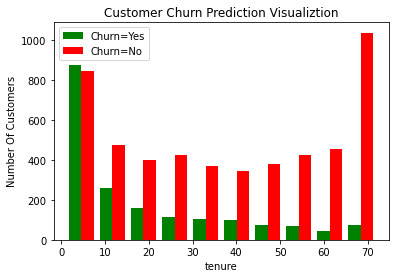

In [15]:
tenure_churn_no = df2[df2.Churn == "No"].tenure
tenure_churn_yes = df2[df2.Churn == "Yes"].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

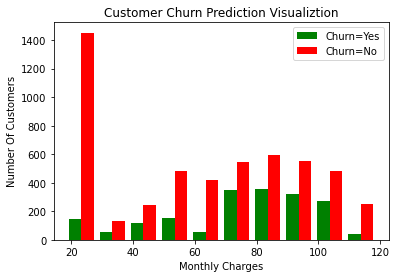

In [16]:
monthly_charges_churn_no = df2[df2.Churn == "No"].MonthlyCharges
monthly_charges_churn_yes = df2[df2.Churn == "Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [17]:
def print_unique_column_values(df):
    for column in df:
        print(f'{column}: {df[column].unique()}',df[column].dtype) 

In [18]:
print_unique_column_values(df2)

gender: ['Female' 'Male'] object
SeniorCitizen: [0 1] int64
Partner: ['Yes' 'No'] object
Dependents: ['No' 'Yes'] object
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] int64
PhoneService: ['No' 'Yes'] object
MultipleLines: ['No phone service' 'No' 'Yes'] object
InternetService: ['DSL' 'Fiber optic' 'No'] object
OnlineSecurity: ['No' 'Yes' 'No internet service'] object
OnlineBackup: ['Yes' 'No' 'No internet service'] object
DeviceProtection: ['No' 'Yes' 'No internet service'] object
TechSupport: ['No' 'Yes' 'No internet service'] object
StreamingTV: ['No' 'Yes' 'No internet service'] object
StreamingMovies: ['No' 'Yes' 'No internet service'] object
Contract: ['Month-to-month' 'One year' 'Two year'] object
PaperlessBilling: ['Yes' 'No'] object
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (a

In [19]:
# df2.replace('No internet service',0,inplace=True)
# df2.replace('No phone service',0,inplace=True)

df2.replace('No internet service','No',inplace=True)
df2.replace('No phone service','No',inplace=True)

C:\Users\91852\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
print_unique_column_values(df2)

gender: ['Female' 'Male'] object
SeniorCitizen: [0 1] int64
Partner: ['Yes' 'No'] object
Dependents: ['No' 'Yes'] object
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] int64
PhoneService: ['No' 'Yes'] object
MultipleLines: ['No' 'Yes'] object
InternetService: ['DSL' 'Fiber optic' 'No'] object
OnlineSecurity: ['No' 'Yes'] object
OnlineBackup: ['Yes' 'No'] object
DeviceProtection: ['No' 'Yes'] object
TechSupport: ['No' 'Yes'] object
StreamingTV: ['No' 'Yes'] object
StreamingMovies: ['No' 'Yes'] object
Contract: ['Month-to-month' 'One year' 'Two year'] object
PaperlessBilling: ['Yes' 'No'] object
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] object
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] float64
TotalCharges: [2. 1. 8. 3. 5. 7. 4. 6. 

In [21]:
df2.replace('No',0,inplace=True)
df2.replace("Yes",1,inplace=True)

# yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
#                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
# for col in yes_no_columns:
#     df2[col].replace({'Yes': 1,'No': 0},inplace=True)

In [22]:
print_unique_column_values(df2)

gender: ['Female' 'Male'] object
SeniorCitizen: [0 1] int64
Partner: [1 0] int64
Dependents: [0 1] int64
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] int64
PhoneService: [0 1] int64
MultipleLines: [0 1] int64
InternetService: ['DSL' 'Fiber optic' 0] object
OnlineSecurity: [0 1] int64
OnlineBackup: [1 0] int64
DeviceProtection: [0 1] int64
TechSupport: [0 1] int64
StreamingTV: [0 1] int64
StreamingMovies: [0 1] int64
Contract: ['Month-to-month' 'One year' 'Two year'] object
PaperlessBilling: [1 0] int64
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] object
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] float64
TotalCharges: [2. 1. 8. 3. 5. 7. 4. 6. 9.] float64
Churn: [0 1] int64


In [23]:
df2['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\91852\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
df2.gender.unique()

array([1, 0], dtype=int64)

In [25]:
columns_for_one_hot_encoding = ['InternetService','Contract','PaymentMethod']
df3 = pd.get_dummies(df2,columns_for_one_hot_encoding)

In [26]:
df3.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [27]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df3[columns_to_scale] = scaler.fit_transform(df3[columns_to_scale])

In [28]:
x = df3.drop('Churn',axis='columns')
y = df3['Churn']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [30]:
x_train.shape

(5625, 26)

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (26,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4539 - accuracy: 0.7780
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8059
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8082
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8075
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8076
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8148
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8124
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8162
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8180
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3861 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.1862 - accuracy: 0.9189
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1888 - accuracy: 0.9184
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9193
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.9216
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9273
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1761 - accuracy: 0.9214
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9278
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.9307
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9266
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 

In [46]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.8808 - accuracy: 0.7619


[0.880847156047821, 0.761904776096344]

In [47]:
y_predicted = model.predict(x_test)

44/44 [==============================] - 0s 803us/step


In [48]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [49]:
y_pred[:10]

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]

In [50]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [44]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       999
           1       0.60      0.49      0.54       408

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.75      0.76      0.75      1407



Text(69.0, 0.5, 'Truth')

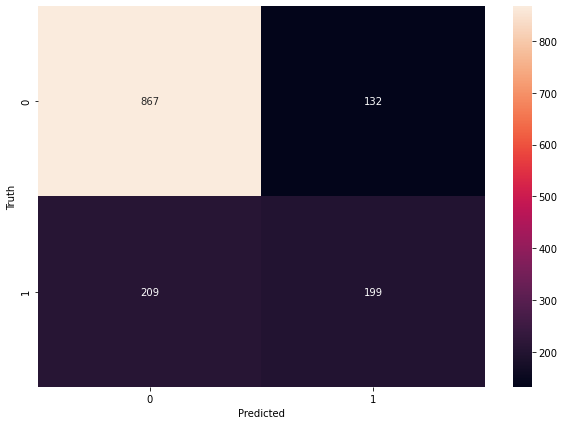

In [38]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')